Disney+ Rising Star Predictor

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from textblob import Word
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 
credits_a = pd.read_csv('credits.csv')
titles_a = pd.read_csv('titles.csv')

In [142]:
titles_a.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,"['family', 'comedy', 'drama']",['US'],NaN,tt0039628,7.9,50969.0,23.515,7.388
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"['horror', 'fantasy', 'animation', 'family', '...",['US'],NaN,tt0041094,6.9,16502.0,16.194,6.500
2,tm61052,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,G,74,"['fantasy', 'animation', 'family', 'romance']",['US'],NaN,tt0042332,7.3,164292.0,93.547,7.035
3,tm87946,Dumbo,MOVIE,Dumbo is a baby elephant born with over-sized ...,1941,G,64,"['animation', 'drama', 'family', 'fantasy']",['US'],NaN,tt0033563,7.2,135045.0,54.265,6.999
4,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1941,G,119,"['animation', 'family', 'fantasy', 'music']",['US'],NaN,tt0032455,7.7,98764.0,43.609,7.382


In [143]:
credits_a.head()

,person_id,id,name,character,role
0,35549,tm89464,Maureen O'Hara,Doris Walker,ACTOR
1,57832,tm89464,John Payne,Fred Gailey,ACTOR
2,57833,tm89464,Edmund Gwenn,Kris Kringle,ACTOR
3,25096,tm89464,Natalie Wood,Susan Walker,ACTOR
4,27185,tm89464,Porter Hall,Granville Sawyer,ACTOR


In [144]:
set(credits_a.role)

{'ACTOR', 'DIRECTOR'}

In [145]:
director_a = credits_a[credits_a['role'] == 'DIRECTOR']

In [146]:
director_a = director_a[['id','name']]

In [147]:
director_a

,id,name
65,tm89464,George Seaton
79,tm61729,James Algar
80,tm61729,Clyde Geronimi
81,tm61729,Jack Kinney
105,tm61052,Wilfred Jackson
...,...,...
30674,tm1314337,Brendan Walter
30675,tm1314337,Jacob Bixenman
30680,tm1299578,William Pinkney III
30687,tm1075680,Kevin Bachar


In [148]:
merged_a = pd.merge(titles_a, director_a, on = 'id')

In [149]:
merged_a = merged_a.rename(columns={'name': 'director'})

In [150]:
merged_a

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,director
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,"['family', 'comedy', 'drama']",['US'],NaN,tt0039628,7.9,50969.0,23.515,7.388,George Seaton
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"['horror', 'fantasy', 'animation', 'family', '...",['US'],NaN,tt0041094,6.9,16502.0,16.194,6.500,James Algar
2,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"['horror', 'fantasy', 'animation', 'family', '...",['US'],NaN,tt0041094,6.9,16502.0,16.194,6.500,Clyde Geronimi
3,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"['horror', 'fantasy', 'animation', 'family', '...",['US'],NaN,tt0041094,6.9,16502.0,16.194,6.500,Jack Kinney
4,tm61052,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,G,74,"['fantasy', 'animation', 'family', 'romance']",['US'],NaN,tt0042332,7.3,164292.0,93.547,7.035,Wilfred Jackson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,tm1314337,Miley Cyrus – Endless Summer Vacation (Backyar...,MOVIE,"Miley Cyrus takes the stage in this must-see, ...",2023,PG-13,42,"['music', 'documentation']",['US'],NaN,tt27001634,NaN,NaN,10.543,10.000,Brendan Walter
1563,tm1314337,Miley Cyrus – Endless Summer Vacation (Backyar...,MOVIE,"Miley Cyrus takes the stage in this must-see, ...",2023,PG-13,42,"['music', 'documentation']",['US'],NaN,tt27001634,NaN,NaN,10.543,10.000,Jacob Bixenman
1564,tm1299578,Black Travel Across America,MOVIE,"Travel Consultant, Martinique Lewis, embarks o...",2023,PG,44,['documentation'],['US'],NaN,NaN,NaN,NaN,5.600,NaN,William Pinkney III
1565,tm1075680,World's Most Dangerous Shark?,MOVIE,"The Great White has a scary reputation, but Ex...",2023,PG-13,44,['documentation'],[],NaN,NaN,NaN,NaN,1.623,NaN,Kevin Bachar


In [151]:
stopslist = []
for x in stopwords.fileids():
    stopslist.append(stopwords.words(x))

merged_a['description'] = merged_a['description'].astype(str)

merged_a['Tokens'] = merged_a['description'].apply(word_tokenize)

In [152]:




merged_a['subjectivity'] = merged_a.apply(lambda x: TextBlob(x['description']).sentiment.subjectivity, axis=1)
merged_a['polarity'] = merged_a.apply(lambda x: TextBlob(x['description']).sentiment.polarity, axis=1)

In [153]:
merged_a

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,director,Tokens,subjectivity,polarity
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,"['family', 'comedy', 'drama']",['US'],NaN,tt0039628,7.9,50969.0,23.515,7.388,George Seaton,"[Kris, Kringle, ,, seemingly, the, embodiment,...",0.286667,0.090000
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"['horror', 'fantasy', 'animation', 'family', '...",['US'],NaN,tt0041094,6.9,16502.0,16.194,6.500,James Algar,"[The, Wind, in, the, Willows, :, Concise, vers...",0.556469,0.098864
2,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"['horror', 'fantasy', 'animation', 'family', '...",['US'],NaN,tt0041094,6.9,16502.0,16.194,6.500,Clyde Geronimi,"[The, Wind, in, the, Willows, :, Concise, vers...",0.556469,0.098864
3,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"['horror', 'fantasy', 'animation', 'family', '...",['US'],NaN,tt0041094,6.9,16502.0,16.194,6.500,Jack Kinney,"[The, Wind, in, the, Willows, :, Concise, vers...",0.556469,0.098864
4,tm61052,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,G,74,"['fantasy', 'animation', 'family', 'romance']",['US'],NaN,tt0042332,7.3,164292.0,93.547,7.035,Wilfred Jackson,"[Cinderella, has, faith, her, dreams, of, a, b...",0.733069,0.134656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,tm1314337,Miley Cyrus – Endless Summer Vacation (Backyar...,MOVIE,"Miley Cyrus takes the stage in this must-see, ...",2023,PG-13,42,"['music', 'documentation']",['US'],NaN,tt27001634,NaN,NaN,10.543,10.000,Brendan Walter,"[Miley, Cyrus, takes, the, stage, in, this, mu...",0.388909,0.034273
1563,tm1314337,Miley Cyrus – Endless Summer Vacation (Backyar...,MOVIE,"Miley Cyrus takes the stage in this must-see, ...",2023,PG-13,42,"['music', 'documentation']",['US'],NaN,tt27001634,NaN,NaN,10.543,10.000,Jacob Bixenman,"[Miley, Cyrus, takes, the, stage, in, this, mu...",0.388909,0.034273
1564,tm1299578,Black Travel Across America,MOVIE,"Travel Consultant, Martinique Lewis, embarks o...",2023,PG,44,['documentation'],['US'],NaN,NaN,NaN,NaN,5.600,NaN,William Pinkney III,"[Travel, Consultant, ,, Martinique, Lewis, ,, ...",0.258333,-0.041667
1565,tm1075680,World's Most Dangerous Shark?,MOVIE,"The Great White has a scary reputation, but Ex...",2023,PG-13,44,['documentation'],[],NaN,NaN,NaN,NaN,1.623,NaN,Kevin Bachar,"[The, Great, White, has, a, scary, reputation,...",0.526531,0.069388


In [154]:
print(merged_a.type.unique())
print('\n')
print(merged_a.tmdb_score.unique())
print('\n')


['MOVIE' 'SHOW']


[ 7.388  6.5    7.035  6.999  7.382  7.004  7.11   6.686  6.567  6.733
  7.1    6.713  6.377  6.7    5.876  6.341  6.269  6.846  7.3    7.32
  6.568  6.952  6.489  7.351  7.208  6.3    6.563  6.158  6.81   6.4
  7.     6.583  6.636  6.25   7.298  6.227  6.464  6.012  6.9    6.393
  6.783  6.35   6.1    6.429  6.789  6.559  6.34   6.61   6.982  6.22
  6.283  6.541  7.034  6.811  6.128  5.4    5.927  6.718  5.924  6.382
  5.99   5.955  6.8    6.682  6.     6.821  6.2    8.207  7.706  8.393
  7.569  6.847  7.133  7.008  7.28   6.6    5.813  6.178  6.146  7.166
  7.104  7.225  7.2    6.907  6.029  7.29   5.9    6.364  7.065  7.6
  6.65   6.524  6.581  7.112  6.423  6.533  8.5    5.241  5.967  5.732
  6.475  6.676  6.925  5.655  7.19   6.177  5.6    7.4    6.538  5.81
  6.515  5.2    6.738  6.607  6.522  7.7    7.352  5.778  6.421  8.
  6.714 10.     8.2    4.     9.     7.5    7.403  7.51   7.038  7.89
  7.663  6.71   6.917  6.868  6.254  6.274  6.47   6.805  5.3    6.18

In [155]:
print(merged_a['director'].value_counts)
print('\n')



<bound method IndexOpsMixin.value_counts of 0             George Seaton
1               James Algar
2            Clyde Geronimi
3               Jack Kinney
4           Wilfred Jackson
               ...         
1562         Brendan Walter
1563         Jacob Bixenman
1564    William Pinkney III
1565           Kevin Bachar
1566            Adam Geiger
Name: director, Length: 1567, dtype: object>




In [156]:
print(merged_a.director.value_counts(normalize = True))
print('\n')

Wilfred Jackson        0.014040
John Lasseter          0.010849
Jack Hannah            0.010849
Paul Hoen              0.010211
Clyde Geronimi         0.009572
                         ...   
Manny Coto             0.000638
Bruce W. Smith         0.000638
Eric Bross             0.000638
Michael Lange          0.000638
William Pinkney III    0.000638
Name: director, Length: 899, dtype: float64




In [157]:
#replace null values in the seasons column with 0
print(merged_a.seasons.unique())


[nan  6.  3.  1.  2.  4.]


In [158]:
merged_a.loc[merged_a['seasons'].isnull(), 'seasons'] = 0


print(merged_a.seasons.unique())

print(merged_a.seasons.value_counts())

[0. 6. 3. 1. 2. 4.]
0.0    1475
1.0      66
3.0      12
2.0      10
6.0       2
4.0       2
Name: seasons, dtype: int64


In [159]:
merged_a.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,director,Tokens,subjectivity,polarity
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,"['family', 'comedy', 'drama']",['US'],0.0,tt0039628,7.9,50969.0,23.515,7.388,George Seaton,"[Kris, Kringle, ,, seemingly, the, embodiment,...",0.286667,0.090000
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"['horror', 'fantasy', 'animation', 'family', '...",['US'],0.0,tt0041094,6.9,16502.0,16.194,6.500,James Algar,"[The, Wind, in, the, Willows, :, Concise, vers...",0.556469,0.098864
2,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"['horror', 'fantasy', 'animation', 'family', '...",['US'],0.0,tt0041094,6.9,16502.0,16.194,6.500,Clyde Geronimi,"[The, Wind, in, the, Willows, :, Concise, vers...",0.556469,0.098864
3,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"['horror', 'fantasy', 'animation', 'family', '...",['US'],0.0,tt0041094,6.9,16502.0,16.194,6.500,Jack Kinney,"[The, Wind, in, the, Willows, :, Concise, vers...",0.556469,0.098864
4,tm61052,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,G,74,"['fantasy', 'animation', 'family', 'romance']",['US'],0.0,tt0042332,7.3,164292.0,93.547,7.035,Wilfred Jackson,"[Cinderella, has, faith, her, dreams, of, a, b...",0.733069,0.134656


In [160]:
print(merged_a.age_certification.unique())

print(merged_a.title.unique())

['G' nan 'PG' 'PG-13' 'TV-G' 'TV-Y7' 'TV-Y' 'TV-PG' 'R' 'TV-14']
['Miracle on 34th Street' 'The Adventures of Ichabod and Mr. Toad'
 'Cinderella' ... 'Black Travel Across America'
 "World's Most Dangerous Shark?" 'Baby Sharks']


In [161]:
merged_a.loc[merged_a['age_certification'].isnull(), 'age_certification'] = 'UNRATED'

print(merged_a.age_certification.unique())

['G' 'UNRATED' 'PG' 'PG-13' 'TV-G' 'TV-Y7' 'TV-Y' 'TV-PG' 'R' 'TV-14']


In [162]:
print(merged_a.tmdb_score.unique())
print('\n', merged_a.tmdb_score.isnull().sum())

[ 7.388  6.5    7.035  6.999  7.382  7.004  7.11   6.686  6.567  6.733
  7.1    6.713  6.377  6.7    5.876  6.341  6.269  6.846  7.3    7.32
  6.568  6.952  6.489  7.351  7.208  6.3    6.563  6.158  6.81   6.4
  7.     6.583  6.636  6.25   7.298  6.227  6.464  6.012  6.9    6.393
  6.783  6.35   6.1    6.429  6.789  6.559  6.34   6.61   6.982  6.22
  6.283  6.541  7.034  6.811  6.128  5.4    5.927  6.718  5.924  6.382
  5.99   5.955  6.8    6.682  6.     6.821  6.2    8.207  7.706  8.393
  7.569  6.847  7.133  7.008  7.28   6.6    5.813  6.178  6.146  7.166
  7.104  7.225  7.2    6.907  6.029  7.29   5.9    6.364  7.065  7.6
  6.65   6.524  6.581  7.112  6.423  6.533  8.5    5.241  5.967  5.732
  6.475  6.676  6.925  5.655  7.19   6.177  5.6    7.4    6.538  5.81
  6.515  5.2    6.738  6.607  6.522  7.7    7.352  5.778  6.421  8.
  6.714 10.     8.2    4.     9.     7.5    7.403  7.51   7.038  7.89
  7.663  6.71   6.917  6.868  6.254  6.274  6.47   6.805  5.3    6.185
  5.799  7.142  5

In [163]:
for index,value in merged_a['tmdb_score'].items():
    if pd.isnull(value):
        merged_a = merged_a.drop(index)

In [164]:
print('\n', merged_a.tmdb_score.isnull().sum())


 0


In [165]:
merged_a

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,director,Tokens,subjectivity,polarity
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,"['family', 'comedy', 'drama']",['US'],0.0,tt0039628,7.9,50969.0,23.515,7.388,George Seaton,"[Kris, Kringle, ,, seemingly, the, embodiment,...",0.286667,0.090000
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"['horror', 'fantasy', 'animation', 'family', '...",['US'],0.0,tt0041094,6.9,16502.0,16.194,6.500,James Algar,"[The, Wind, in, the, Willows, :, Concise, vers...",0.556469,0.098864
2,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"['horror', 'fantasy', 'animation', 'family', '...",['US'],0.0,tt0041094,6.9,16502.0,16.194,6.500,Clyde Geronimi,"[The, Wind, in, the, Willows, :, Concise, vers...",0.556469,0.098864
3,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"['horror', 'fantasy', 'animation', 'family', '...",['US'],0.0,tt0041094,6.9,16502.0,16.194,6.500,Jack Kinney,"[The, Wind, in, the, Willows, :, Concise, vers...",0.556469,0.098864
4,tm61052,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,G,74,"['fantasy', 'animation', 'family', 'romance']",['US'],0.0,tt0042332,7.3,164292.0,93.547,7.035,Wilfred Jackson,"[Cinderella, has, faith, her, dreams, of, a, b...",0.733069,0.134656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1560,tm1304158,Soul of a Nation Presents: Black in Vegas,MOVIE,This special explores the history of Black ent...,2023,PG-13,41,['documentation'],['US'],0.0,NaN,NaN,NaN,2.954,2.000,Tine,"[This, special, explores, the, history, of, Bl...",0.334921,0.063492
1561,tm24952,Whispers: An Elephant's Tale,MOVIE,A nameless baby elephant-steer was just gettin...,2023,G,72,"['drama', 'family']",['US'],0.0,tt0185007,5.0,390.0,4.271,4.600,Dereck Joubert,"[A, nameless, baby, elephant-steer, was, just,...",0.613292,-0.146694
1562,tm1314337,Miley Cyrus – Endless Summer Vacation (Backyar...,MOVIE,"Miley Cyrus takes the stage in this must-see, ...",2023,PG-13,42,"['music', 'documentation']",['US'],0.0,tt27001634,NaN,NaN,10.543,10.000,Brendan Walter,"[Miley, Cyrus, takes, the, stage, in, this, mu...",0.388909,0.034273
1563,tm1314337,Miley Cyrus – Endless Summer Vacation (Backyar...,MOVIE,"Miley Cyrus takes the stage in this must-see, ...",2023,PG-13,42,"['music', 'documentation']",['US'],0.0,tt27001634,NaN,NaN,10.543,10.000,Jacob Bixenman,"[Miley, Cyrus, takes, the, stage, in, this, mu...",0.388909,0.034273


In [166]:
print(merged_a.release_year.unique())

[1947 1950 1941 1942 1938 1935 1937 1940 1948 1943 1945 1933 1928 1934
 1932 1939 1936 1949 1946 1944 1977 1965 1980 1971 1964 1979 1960 1953
 1969 1967 1956 1973 1961 1955 1963 1970 1951 1962 1966 1974 1975 1978
 1957 1958 1976 1968 1952 1959 1954 1972 1987 1988 1990 1983 1985 1989
 1986 1982 1984 1981 1999 1998 1993 1995 1994 1992 1991 1996 2000 1997
 2009 2008 2003 2004 2007 2001 2005 2006 2002 2010 2012 2011 2014 2013
 2016 2015 2017 2018 2019 2020 2022 2021 2023]


In [167]:
print(merged_a.age_certification.unique())

def rate(x):
    if x == 'UNRATED':
        return 0
    elif x == 'G':
        return 1
    elif x == 'PG':
        return 2
    elif x == 'PG-13':
        return 3
    elif x == 'R':
        return 4
    elif x == 'TV-G':
        return 5
    elif x == 'TV-Y7':
        return 6
    elif x == 'TV-Y':
        return 7
    elif x == 'TV-PG':
        return 8
    return 9


merged_a['age_rating'] = merged_a['age_certification'].apply(rate)

['G' 'UNRATED' 'PG' 'PG-13' 'TV-G' 'TV-Y7' 'TV-Y' 'TV-PG' 'R' 'TV-14']


In [168]:
merged_a

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,director,Tokens,subjectivity,polarity,age_rating
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,"['family', 'comedy', 'drama']",['US'],0.0,tt0039628,7.9,50969.0,23.515,7.388,George Seaton,"[Kris, Kringle, ,, seemingly, the, embodiment,...",0.286667,0.090000,1
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"['horror', 'fantasy', 'animation', 'family', '...",['US'],0.0,tt0041094,6.9,16502.0,16.194,6.500,James Algar,"[The, Wind, in, the, Willows, :, Concise, vers...",0.556469,0.098864,1
2,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"['horror', 'fantasy', 'animation', 'family', '...",['US'],0.0,tt0041094,6.9,16502.0,16.194,6.500,Clyde Geronimi,"[The, Wind, in, the, Willows, :, Concise, vers...",0.556469,0.098864,1
3,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"['horror', 'fantasy', 'animation', 'family', '...",['US'],0.0,tt0041094,6.9,16502.0,16.194,6.500,Jack Kinney,"[The, Wind, in, the, Willows, :, Concise, vers...",0.556469,0.098864,1
4,tm61052,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,G,74,"['fantasy', 'animation', 'family', 'romance']",['US'],0.0,tt0042332,7.3,164292.0,93.547,7.035,Wilfred Jackson,"[Cinderella, has, faith, her, dreams, of, a, b...",0.733069,0.134656,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1560,tm1304158,Soul of a Nation Presents: Black in Vegas,MOVIE,This special explores the history of Black ent...,2023,PG-13,41,['documentation'],['US'],0.0,NaN,NaN,NaN,2.954,2.000,Tine,"[This, special, explores, the, history, of, Bl...",0.334921,0.063492,3
1561,tm24952,Whispers: An Elephant's Tale,MOVIE,A nameless baby elephant-steer was just gettin...,2023,G,72,"['drama', 'family']",['US'],0.0,tt0185007,5.0,390.0,4.271,4.600,Dereck Joubert,"[A, nameless, baby, elephant-steer, was, just,...",0.613292,-0.146694,1
1562,tm1314337,Miley Cyrus – Endless Summer Vacation (Backyar...,MOVIE,"Miley Cyrus takes the stage in this must-see, ...",2023,PG-13,42,"['music', 'documentation']",['US'],0.0,tt27001634,NaN,NaN,10.543,10.000,Brendan Walter,"[Miley, Cyrus, takes, the, stage, in, this, mu...",0.388909,0.034273,3
1563,tm1314337,Miley Cyrus – Endless Summer Vacation (Backyar...,MOVIE,"Miley Cyrus takes the stage in this must-see, ...",2023,PG-13,42,"['music', 'documentation']",['US'],0.0,tt27001634,NaN,NaN,10.543,10.000,Jacob Bixenman,"[Miley, Cyrus, takes, the, stage, in, this, mu...",0.388909,0.034273,3


In [169]:
#The data is now cleaned up. Next is to predict the rising star directors
#each year 100 individuals have the highest tmdb score and produce the most popular works on tmdb
#using KNN, Multilinear Regression, and random forest

In [170]:
#Linear Regression - Independent variables are Year, Runtime, Seasons, rating, tmdb_popularity
#the dependent variable is tmdb_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from dmba import plotDecisionTree
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np


X = merged_a[['release_year','runtime','seasons','tmdb_popularity','age_rating', 'subjectivity', 'polarity']]
y = merged_a['tmdb_score']

X.head()

,release_year,runtime,seasons,tmdb_popularity,age_rating,subjectivity,polarity
0,1947,96,0.0,23.515,1,0.286667,0.090000
1,1950,68,0.0,16.194,1,0.556469,0.098864
2,1950,68,0.0,16.194,1,0.556469,0.098864
3,1950,68,0.0,16.194,1,0.556469,0.098864
4,1950,74,0.0,93.547,1,0.733069,0.134656


In [171]:
#multilinear regression

training_X, test_X, training_y, test_y = train_test_split(X,y, test_size = 0.20, random_state = 1)

regr = LinearRegression()
regr.fit(training_X, training_y) 

y_trainpred = regr.predict(training_X)
y_pred = regr.predict(test_X)
#print(y_pred, '\n')

director = merged_a.loc[merged_a['director'] == 'George Seaton']
features = director[['release_year','runtime','seasons','tmdb_popularity','age_rating','subjectivity', 'polarity']]
mlr_pred = regr.predict(features)

mse = mean_squared_error(test_y, y_pred)
print("Mean squared error: ", mse)

print("Rating Prediction: ", mlr_pred)

Mean squared error:  0.9314764841010988
Rating Prediction:  [6.82662542]


In [172]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor().fit(training_X, training_y)
DTRtrainpred = DTR.predict(training_X)
DTRtestpred = DTR.predict(test_X)
#print(DTRtestpred, '\n')
director = merged_a.loc[merged_a['director'] == 'George Seaton']
features2 = director[['release_year','runtime','seasons','tmdb_popularity','age_rating','subjectivity', 'polarity']]
mlr_pred2 = DTR.predict(features2)

mse = mean_squared_error(test_y, DTRtestpred)
print("Mean squared error: ", mse)

print("Rating Prediction: ", mlr_pred2)

Mean squared error:  1.1329612098360657
Rating Prediction:  [7.388]


In [173]:
#Random Forest

RF = RandomForestRegressor(n_estimators = 10, random_state = 1)
RFR = RF.fit(training_X, training_y)
RFRtrainpred = RFR.predict(training_X)
RFRtestpred = RFR.predict(test_X)
#print(RFRtestpred, '\n')
director = merged_a.loc[merged_a['director'] == 'George Seaton']
features3 = director[['release_year','runtime','seasons','tmdb_popularity','age_rating','subjectivity', 'polarity']]
mlr_pred3 = RFR.predict(features3)

mse = mean_squared_error(test_y, RFRtestpred)
print("Mean squared error: ", mse)

print("Rating Prediction: ", mlr_pred3)


Mean squared error:  0.6868640860327869
Rating Prediction:  [6.969]


In [174]:

from xgboost import XGBRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

training_X, test_X, training_y, test_y = train_test_split(X,y, test_size = 0.4, random_state = 1)

xgbr = XGBRegressor(verbosity = 0)
print(xgbr)

xgbr.fit(training_X, training_y)
score = xgbr.score(training_X, training_y)
print("training score: ", score)

ypredict = xgbr.predict(test_X)
ytrain_predict = xgbr.predict(training_X)

features4 = director[['release_year','runtime','seasons','tmdb_popularity','age_rating','subjectivity', 'polarity']]
mlr_pred4 = xgbr.predict(features)

mse = mean_squared_error(test_y, ypredict)
print("Mean squared error: ", mse)

print("Rating Prediction: ", mlr_pred4)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
training score:  0.9956913566706367
Mean squared error:  0.6950019163049747
Rating Prediction:  [7.3549895]


In [175]:
#Random Forest In Practice
director2 = merged_a.loc[merged_a['director'] == 'Wilfred Jackson']
features2 = director2[['release_year','runtime','seasons','tmdb_popularity','age_rating','subjectivity', 'polarity']]

#print(features2)
mlr_prediction = RFR.predict(features2)

print("Rating Prediction: ", mlr_prediction)

Rating Prediction:  [7.035  6.999  7.382  6.7525 7.1    5.876  6.2231 6.6134 6.5264 7.2648
 7.0689 6.451  6.4369 6.4    6.3217 6.1006 5.9346 7.1161 7.225  7.257
 9.8    9.4   ]


In [176]:
def random_stats(df):
    di_year = df['release_year'].max()
    di_age = np.random.uniform(low=df['age_rating'].max(), high=df['age_rating'].min())
    di_pop = np.random.uniform(low=df['tmdb_popularity'].max(), high=df['tmdb_popularity'].min())
    di_seas = np.random.uniform(low=df['seasons'].max(), high=df['seasons'].min())
    di_run = np.random.uniform(low=df['runtime'].max(), high=df['runtime'].min())
    di_sub = np.random.uniform(low=df['subjectivity'].max(), high=df['subjectivity'].min())
    di_pol = np.random.uniform(low=df['polarity'].max(), high=df['polarity'].min())
    di_list = [di_run, di_seas, di_pop, di_age, di_sub, di_pol]
    return di_list

In [177]:
def year_pred(time, person):
    director2 = merged_a.loc[merged_a['director'] == person]
    time_list = []
    result_df = pd.DataFrame(columns=['runtime', 'seasons', 'tmdb_popularity', 'age_rating', 'subjectivity', 'polarity'])
  
    for _ in range(time):
        stats = random_stats(director2)
        time_list.append(stats)
    result_df = pd.DataFrame(time_list, columns = ['runtime', 'seasons', 'tmdb_popularity', 'age_rating', 'subjectivity', 'polarity'])
    result_df.insert(0, 'release_year', range(2021, 2021 + len(result_df)))
    return result_df

def ran_for(df, person):
    randomfor = RFR.predict(df)
    prediction_bar = pd.DataFrame()
    
    prediction_bar['Year'] = range(2021, 2021 + len(randomfor))
    prediction_bar['Rating'] = randomfor
    prediction_bar['Director'] = np.repeat(person, len(randomfor))


    return (prediction_bar)

def process(time, person):
    a1 = year_pred (time, person)
    answer = ran_for(a1, person)
    return answer



In [178]:
year_pred(12,'Wilfred Jackson')

,release_year,runtime,seasons,tmdb_popularity,age_rating,subjectivity,polarity
0,2021,65.270665,0.0,16.197459,0.498092,0.346154,0.058236
1,2022,14.429828,0.0,52.511983,0.234438,0.356945,0.382651
2,2023,16.975656,0.0,5.740335,0.129179,0.262104,0.020547
3,2024,26.546864,0.0,68.475050,0.956528,0.946828,0.439493
4,2025,86.704467,0.0,80.642295,0.313695,0.798614,-0.053793
5,2026,38.704892,0.0,5.912902,0.716673,0.601085,0.461852
6,2027,114.404293,0.0,9.987183,0.480118,0.785870,-0.277682
7,2028,69.092071,0.0,72.622673,0.477948,0.568467,0.291787
8,2029,34.030860,0.0,86.995922,0.045799,0.553969,-0.060813
9,2030,69.090114,0.0,12.441749,0.818559,0.776497,-0.392556


In [179]:
abc = ran_for(year_pred(12,'Wilfred Jackson'),'Wilfred Jackson')

print(abc)

#plt.bar(abc['Year'],abc['Rating'])
#plt.xlabel('Year')
#plt.ylabel('Ratings')
#plt.show()


    Year  Rating         Director
0   2021  7.1774  Wilfred Jackson
1   2022  6.6420  Wilfred Jackson
2   2023  6.2852  Wilfred Jackson
3   2024  5.8576  Wilfred Jackson
4   2025  6.1963  Wilfred Jackson
5   2026  6.7399  Wilfred Jackson
6   2027  5.4100  Wilfred Jackson
7   2028  6.0137  Wilfred Jackson
8   2029  7.2923  Wilfred Jackson
9   2030  5.9711  Wilfred Jackson
10  2031  6.1913  Wilfred Jackson
11  2032  5.9178  Wilfred Jackson


In [180]:
#Now get the data for all Directors
time = 5
rating_df= pd.DataFrame()

for name in merged_a['director'].unique():
    temp_df = process(time,name)
    #temp_df = ran_for(year_pred(time,name),name)
    rating_df = rating_df.append(temp_df)

rating_df.head(15)

,Year,Rating,Director
0,2021,6.8682,George Seaton
1,2022,6.5280,George Seaton
2,2023,6.5290,George Seaton
3,2024,6.5290,George Seaton
4,2025,6.5290,George Seaton
0,2021,7.5900,James Algar
1,2022,6.2263,James Algar
2,2023,5.4200,James Algar
3,2024,5.9708,James Algar
4,2025,7.0964,James Algar


In [181]:
#The average rating of all directors within the given amount of years (5)
average_rating = rating_df.groupby('Director')['Rating'].mean().reset_index()

big_five = average_rating.sort_values(by='Rating', ascending=False).head()
small_five = average_rating.sort_values(by='Rating', ascending=True).head()

print("The top 5 directors based on average: ")
print('\n',big_five)
print('\n', "The bottom 5 directors based on average: ")
print('\n',small_five)





The top 5 directors based on average: 

            Director   Rating
287  Gavin O'Connor  8.22948
334  Jacob Bixenman  8.22218
106  Brendan Walter  8.22218
276  Fred Zinnemann  8.22104
108  Brett Sullivan  8.12054

 The bottom 5 directors based on average: 

             Director   Rating
2         Aaron Pope  2.74266
247      Emilie Firn  2.74266
465       Ken Corben  2.94800
155  Christian Meola  2.99478
379   Jennie Hammond  3.02000


In [182]:
big_directors = rating_df.merge(big_five['Director'], on='Director')

print(big_directors.head(10))

small_directors = rating_df.merge(small_five['Director'], on='Director')

print('\n',small_directors)

   Year  Rating        Director
0  2021  7.4696  Fred Zinnemann
1  2022  7.5431  Fred Zinnemann
2  2023  8.6975  Fred Zinnemann
3  2024  8.6975  Fred Zinnemann
4  2025  8.6975  Fred Zinnemann
5  2021  7.1468  Gavin O'Connor
6  2022  7.9645  Gavin O'Connor
7  2023  8.6787  Gavin O'Connor
8  2024  8.6787  Gavin O'Connor
9  2025  8.6787  Gavin O'Connor

     Year  Rating         Director
0   2021  6.7400       Ken Corben
1   2022  2.0000       Ken Corben
2   2023  2.0000       Ken Corben
3   2024  2.0000       Ken Corben
4   2025  2.0000       Ken Corben
5   2021  2.5333      Emilie Firn
6   2022  3.1700      Emilie Firn
7   2023  2.6700      Emilie Firn
8   2024  2.6700      Emilie Firn
9   2025  2.6700      Emilie Firn
10  2021  2.5333       Aaron Pope
11  2022  3.1700       Aaron Pope
12  2023  2.6700       Aaron Pope
13  2024  2.6700       Aaron Pope
14  2025  2.6700       Aaron Pope
15  2021  6.9739  Christian Meola
16  2022  2.0000  Christian Meola
17  2023  2.0000  Christian Meola


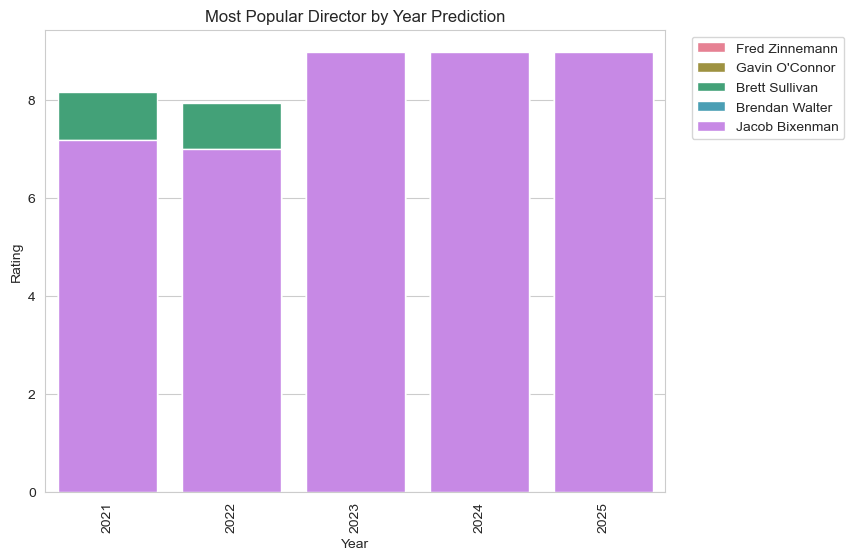

In [183]:
palette = sns.color_palette('husl', len(big_directors['Director'].unique()))

sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
sns.barplot(x='Year', y='Rating', hue='Director', 
            data= big_directors, dodge=False, palette='husl')
plt.title('Most Popular Director by Year Prediction')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xticks(rotation=90)
plt.show()

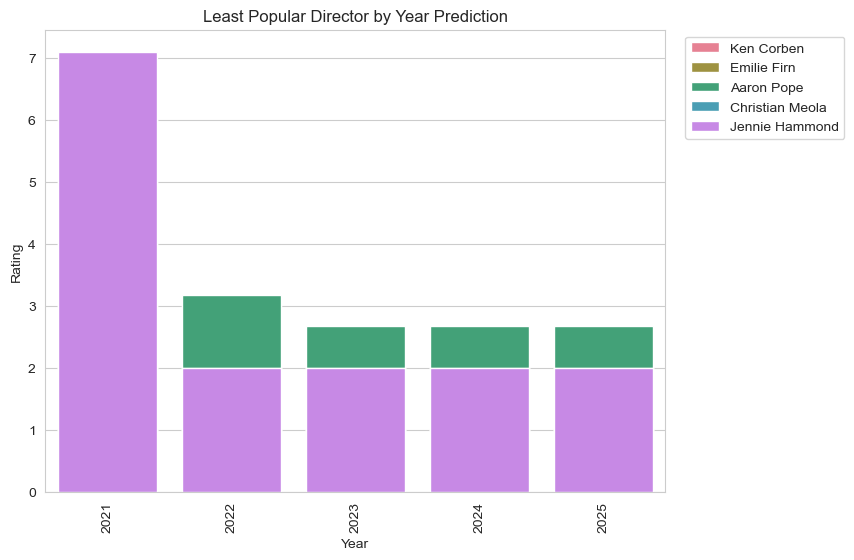

In [184]:
palette = sns.color_palette('husl', len(small_directors['Director'].unique()))

sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
sns.barplot(x='Year', y='Rating', hue='Director', 
            data= small_directors, dodge=False, palette='husl')
plt.title('Least Popular Director by Year Prediction')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xticks(rotation=90)
plt.show()

<AxesSubplot: xlabel='Year', ylabel='Rating'>

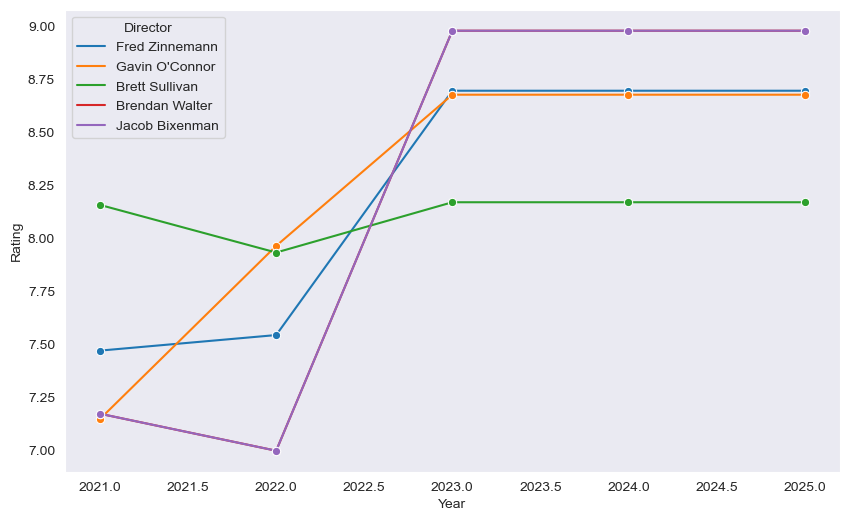

In [185]:
#the graph redesigned as a line graph
%matplotlib inline
sns.set_style('dark')
plt.figure(figsize=(10, 6))
sns.lineplot(data=big_directors, x='Year', y='Rating', hue='Director', marker='o')


<AxesSubplot: xlabel='Year', ylabel='Rating'>

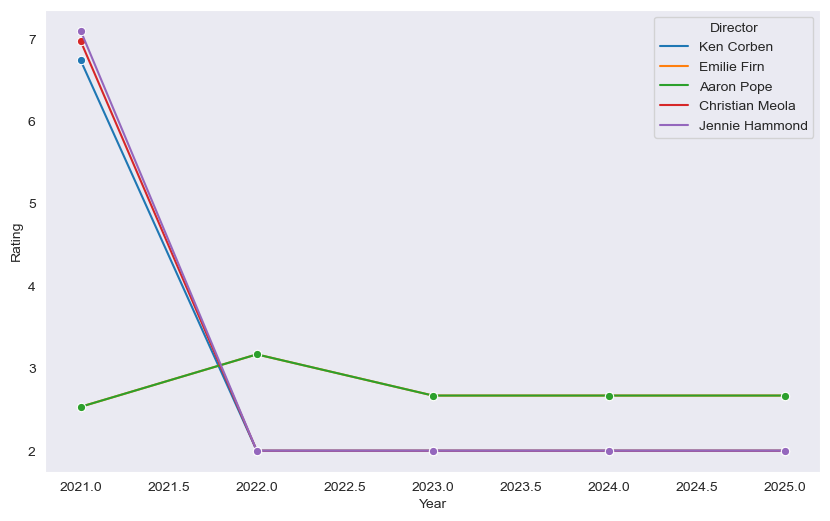

In [186]:
%matplotlib inline
sns.set_style('dark')
plt.figure(figsize=(10, 6))
sns.lineplot(data=small_directors, x='Year', y='Rating', hue='Director', marker='o')
